In [ ]:
# 12 Unsupervised Learning

In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import svd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy

%matplotlib inline


## 12.5.1 Principal Components Analysis

In [3]:
USArrests = pd.read_csv('../data/USArrests.csv', index_col=0)
USArrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [4]:
# pandas has a built-in function to get the mean and variance of each column
print(USArrests.mean())
print(USArrests.var())

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64
Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64


In [5]:
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(USArrests), index=USArrests.index, columns=USArrests.columns)
# The loading vectors (i.e. these are the projection of the data onto the principal components)
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=USArrests.columns, columns=['V1', 'V2', 'V3', 'V4'])
pca_loadings

""" 
Depends on the version of python/module, you may see a flipped loading vector in signs. 
This is normal because the orientation of the principal components is not deterministic. 
"""
# X1=pd.DataFrame(sc.inverse_transform(X), index=USArrests.index, columns=USArrests.columns)

' \nDepends on the version of python/module, you may see a flipped loading vector in signs. \nThis is normal because the orientation of the principal components is not deterministic. \n'

In [8]:
# fit the PCA model and transform X to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
df_plot.head()

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


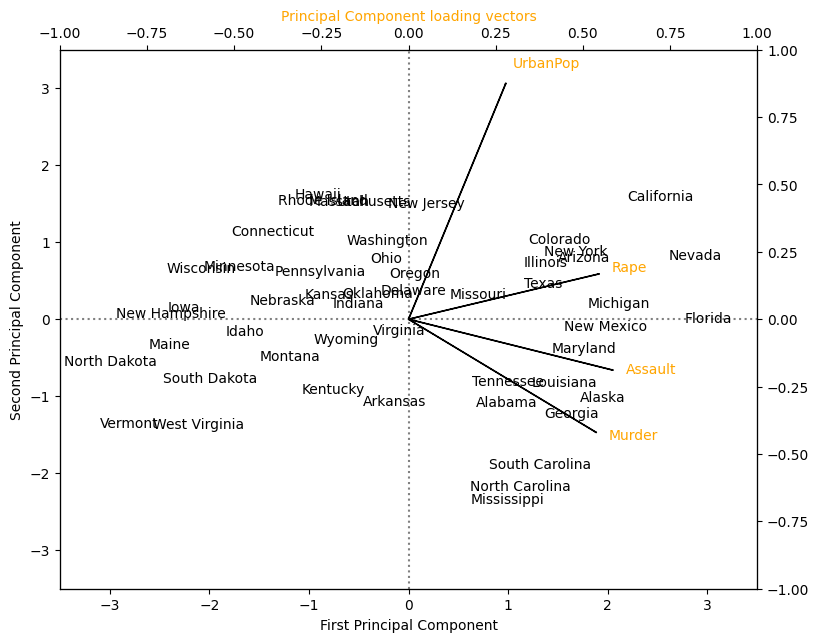

In [9]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

# plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='orange')

# plot vectors
ax2.arrow(0,0,pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,pca_loadings.V1[3], -pca_loadings.V2[3])
plt.show()

In [10]:
# in previous chapter, we talked about PCR. In that case, we could use the downstream task's (i.e. regression RMSE) 
# performance to select the hyperparameters (i.e. # number of PCs).
# here let us use the portion of explained variance to select the number of PCs. Those info is available in the pca object.
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)


[2.53085875 1.00996444 0.36383998 0.17696948]
[0.62006039 0.24744129 0.0891408  0.04335752]


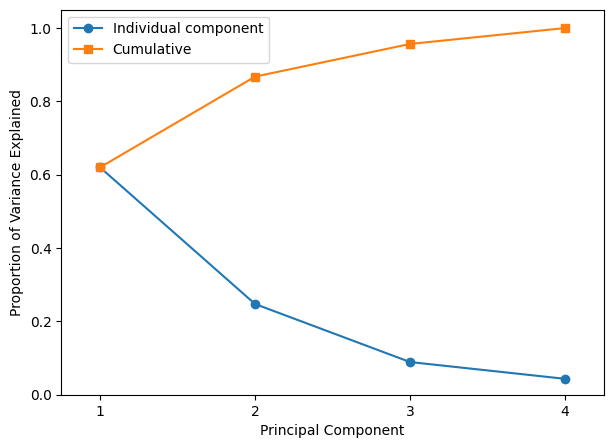

'\nIn this case, if we want to preserve 80% of variance of the data, we need to select 2 PCs.\n'

In [11]:
plt.figure(figsize=(7,5))

plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.legend(loc=2)
plt.show()

"""
In this case, if we want to preserve 80% of variance of the data, we need to select 2 PCs.
"""

## 12.5.2 Matrix Completion

In [12]:
# run sigular value decomposition on the data (SVD)
u, s, vh = svd(X, full_matrices=False)
u.shape, s.shape, vh.shape

((50, 4), (4,), (4, 4))

In [13]:
# this vh will be the principal components similar to pca.components_ (up to an unimportant sign flip)
# The matrix u is equivalent to the matrix of standardized scores, and the standard deviations are in the vector s.
print(vh)
print ('-------')
print(pca.components_)


[[-0.53589947 -0.58318363 -0.27819087 -0.54343209]
 [ 0.41818087  0.1879856  -0.87280619 -0.16731864]
 [-0.34123273 -0.26814843 -0.37801579  0.81777791]
 [ 0.6492278  -0.74340748  0.13387773  0.08902432]]
-------
[[ 0.53589947  0.58318363  0.27819087  0.54343209]
 [ 0.41818087  0.1879856  -0.87280619 -0.16731864]
 [-0.34123273 -0.26814843 -0.37801579  0.81777791]
 [ 0.6492278  -0.74340748  0.13387773  0.08902432]]


In [14]:
# reconstruction based on full SVD
np.allclose(X, np.dot(u * s, vh))

True

In [15]:
# reconstruction based on reduced SVD
num_components = 3
recovered = pd.DataFrame(np.dot(u[:, :num_components] * s[:num_components,], vh[:num_components,:]))

In [16]:
print(recovered.head(n=2))
print(X.head(n=2))

"""
Change the num_components from 1 to 4 and see how the reconstruction error changes.
"""

          0         1         2         3
0  1.153726  0.906957 -0.547116 -0.017363
1  0.797759  0.792013 -1.165350  2.548469
           Murder   Assault  UrbanPop      Rape
Alabama  1.255179  0.790787 -0.526195 -0.003451
Alaska   0.513019  1.118060 -1.224067  2.509424


'\nChange the num_components from 1 to 4 and see how the reconstruction error changes.\n'

## 12.5.3 Clustering
### K-means clustering 

In [17]:
# generate data
np.random.seed(21)
X = np.random.standard_normal((50,2))
X[:25,0] = X[:25,0]+3
X[:25,1] = X[:25,1]-4

In [18]:
n_clusters = 2
km1 = KMeans(n_clusters=n_clusters, n_init=20)
km1.fit(X)

n_clusters = 3
km2 = KMeans(n_clusters=n_clusters, n_init=20)
km2.fit(X)

KMeans(n_clusters=3, n_init=20)

In [19]:
print(km1.labels_)
print(dir(km1)) # we can use dir to see other saved attributes

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_algorithm', '_check_feature_names', '_check_mkl_vcomp', '_check_n_features', '_check_params', '_check_test_data', '_estimator_type', '_get_param_names', '_get_tags', '_init_centroids', '_more_tags', '_n_features_out', '_n_init', '_n_threads', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_tol', '_transform', '_validate_center_shape', '_validate_data', '_warn_mkl_vcomp', 'algorithm', 'cluster_centers_', 'copy_x', 'fit', 'fit_predict', 'fit_transform', 'ge

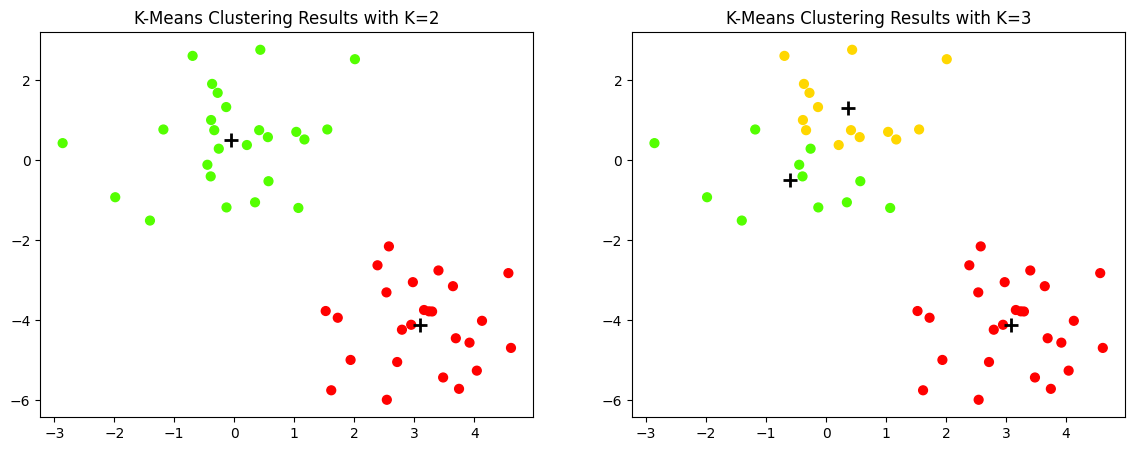

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.scatter(X[:,0], X[:,1], s=40, c=km1.labels_, cmap=plt.cm.prism) 
ax1.set_title('K-Means Clustering Results with K=2')
ax1.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)

ax2.scatter(X[:,0], X[:,1], s=40, c=km2.labels_, cmap=plt.cm.prism) 
ax2.set_title('K-Means Clustering Results with K=3')
ax2.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)
plt.show()

### Hierarchical Clustering

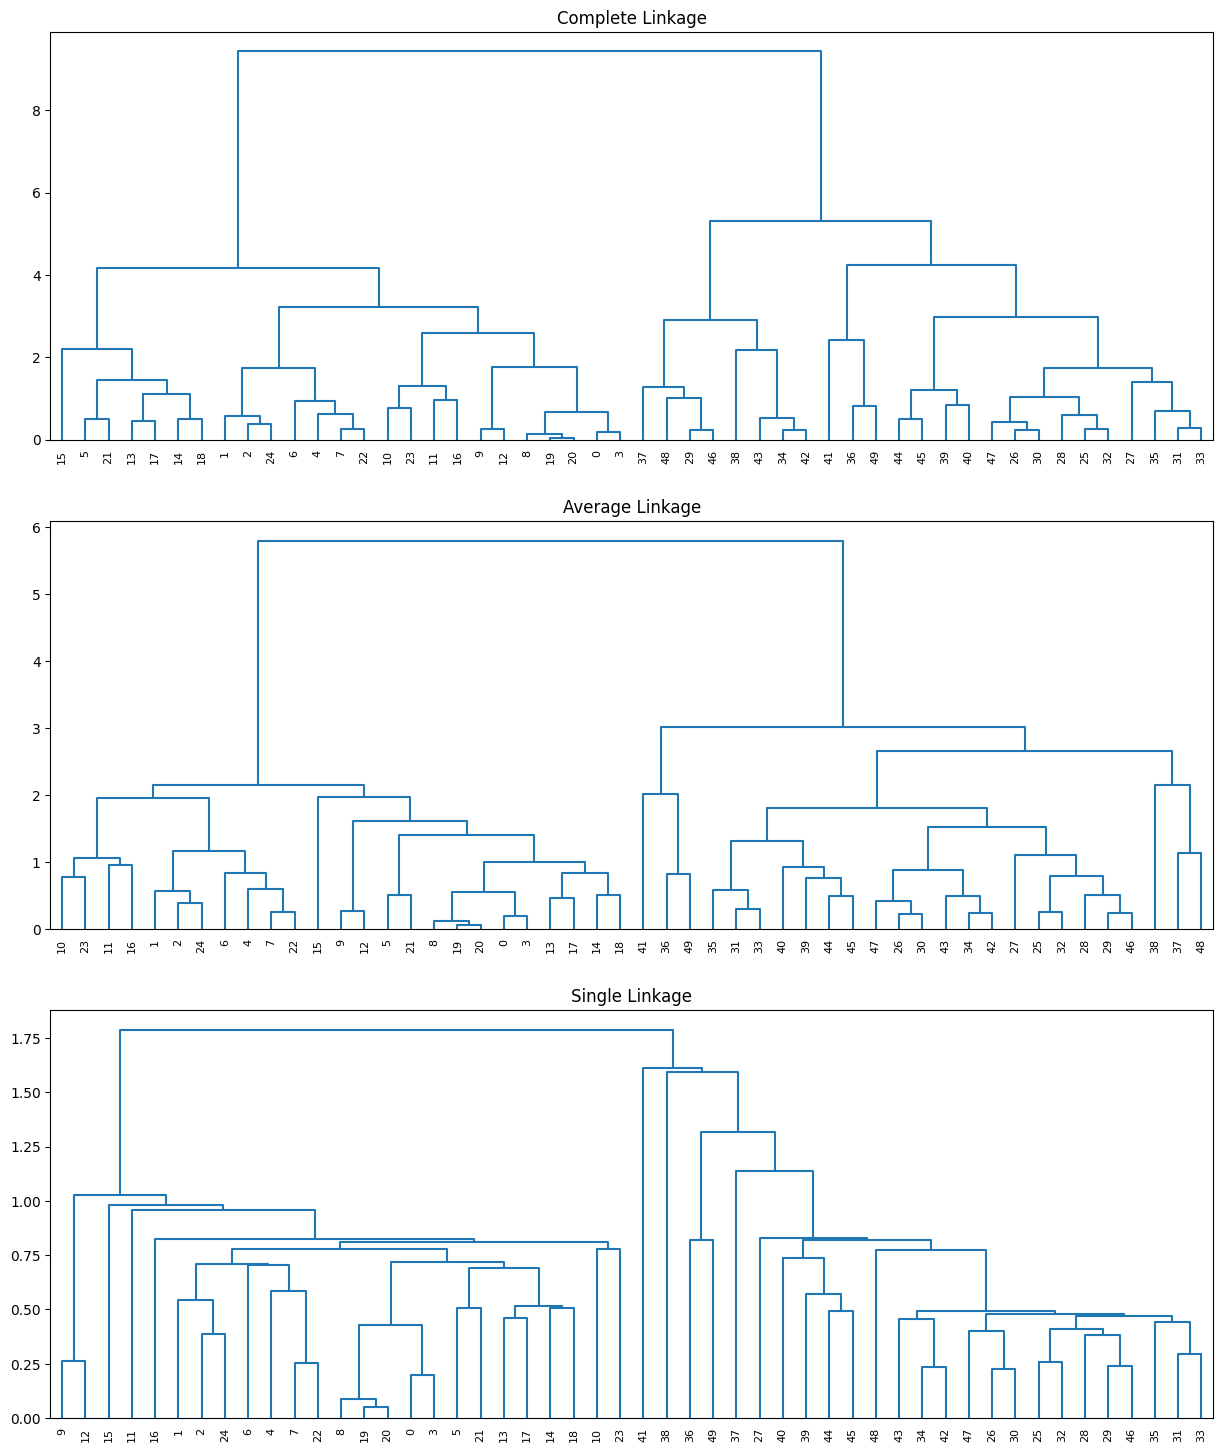

In [21]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,18))

for linkage, cluster, ax in zip([hierarchy.complete(X), hierarchy.average(X), hierarchy.single(X)], ['c1','c2','c3'],
                                [ax1,ax2,ax3]):
    cluster = hierarchy.dendrogram(linkage, ax=ax, color_threshold=0)

ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Single Linkage')
plt.show()

## 12.5.4 NCI60 Data Example
PCA on the NCI60 Data

In [23]:
# I was not able to make the json work, so I went back to R and saved the data and label separately.
X = pd.read_csv('../data/NCI60_data.csv')
y = pd.read_csv('../data/NCI60_labs.csv')

In [24]:
pca2 = PCA()
X_standardized = StandardScaler().fit_transform(X)
df2_plot = pd.DataFrame(pca2.fit_transform(X_standardized))

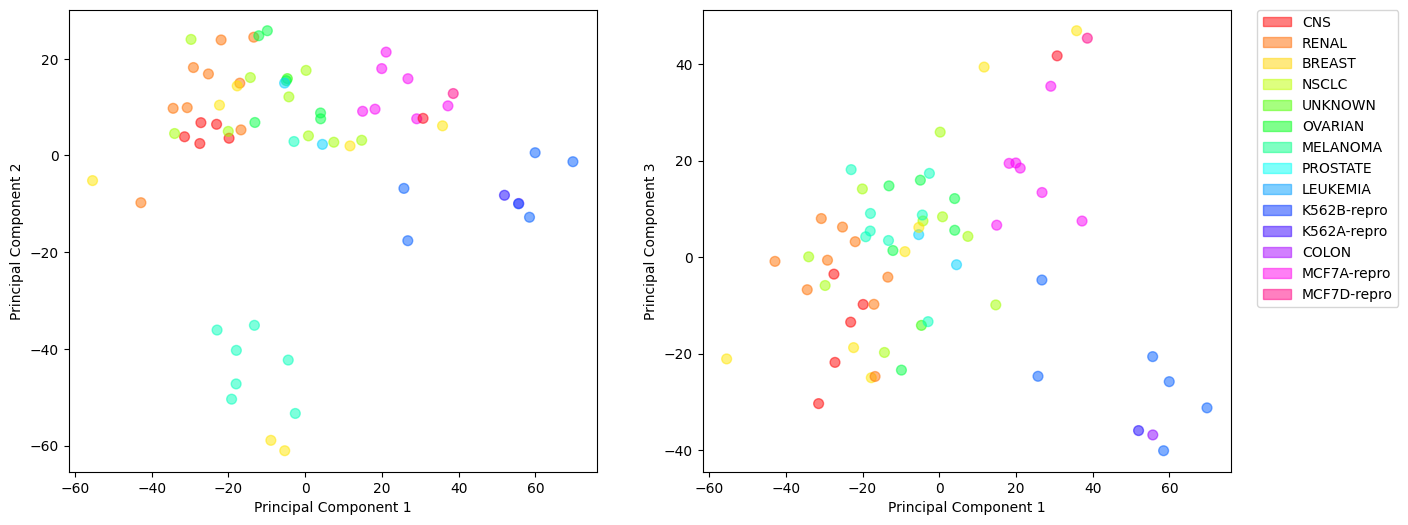

In [25]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

color_idx = pd.factorize(y.iloc[:, 0])[0]
cmap = plt.cm.hsv

# left plot
ax1.scatter(df2_plot.iloc[:,0], -df2_plot.iloc[:,1], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax1.set_ylabel('Principal Component 2')

# right plot
ax2.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,2], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax2.set_ylabel('Principal Component 3')

# custom legend for the classes (y) since we do not create scatter plots per class (which could have their own labels).
handles = []
labels = pd.factorize(y.iloc[:, 0].unique())
norm = mpl.colors.Normalize(vmin=0.0, vmax=14.0)

for i, v in zip(labels[0], labels[1]):
    handles.append(mpl.patches.Patch(color=cmap(norm(i)), label=v, alpha=0.5))

ax2.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# xlabel for both plots
for ax in fig.axes:
    ax.set_xlabel('Principal Component 1')   

In [26]:
pd.DataFrame([df2_plot.iloc[:,:5].std(axis=0, ddof=0).array,
              pca2.explained_variance_ratio_[:5],
              np.cumsum(pca2.explained_variance_ratio_[:5])],
             index=['Standard Deviation', 'Proportion of Variance', 'Cumulative Proportion'],
             columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

,PC1,PC2,PC3,PC4,PC5
Standard Deviation,27.853469,21.481355,19.820465,17.032556,15.971807
Proportion of Variance,0.113589,0.067562,0.057518,0.042476,0.037350
Cumulative Proportion,0.113589,0.181151,0.238670,0.281145,0.318495


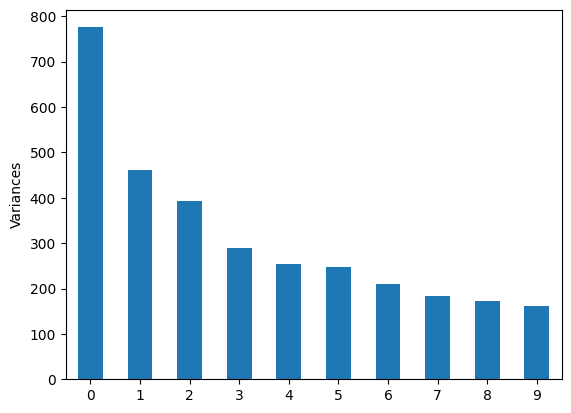

In [27]:
df2_plot.iloc[:,:10].var(axis=0, ddof=0).plot(kind='bar', rot=0)
plt.ylabel('Variances')
plt.show()

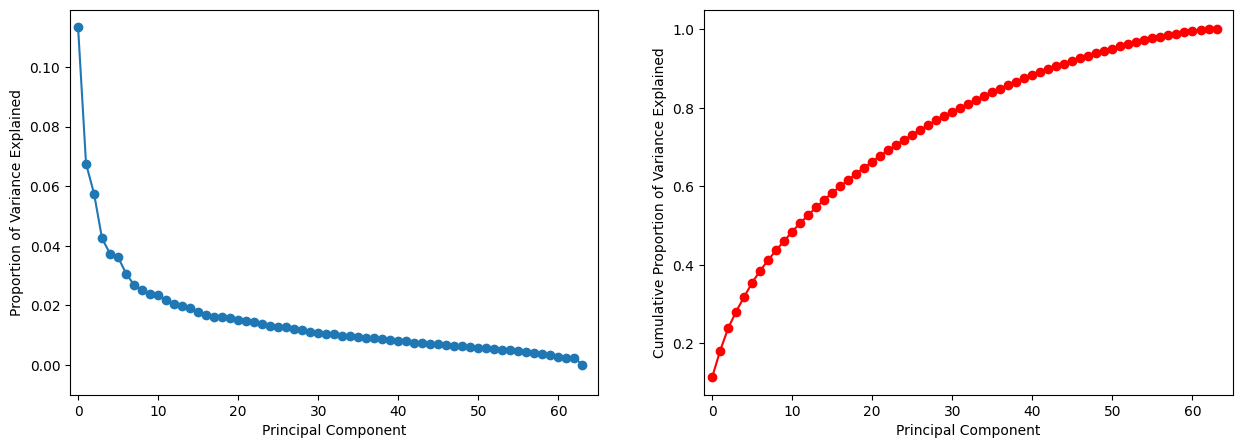

In [28]:
fig , (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

# left plot
ax1.plot(pca2.explained_variance_ratio_, '-o')
ax1.set_ylabel('Proportion of Variance Explained')
ax1.set_ylim(ymin=-0.01)

# right plot
ax2.plot(np.cumsum(pca2.explained_variance_ratio_), '-ro')
ax2.set_ylabel('Cumulative Proportion of Variance Explained')
ax2.set_ylim(ymax=1.05)

for ax in fig.axes:
    ax.set_xlabel('Principal Component')
    ax.set_xlim(-1,65) 

### Clustering the Observations of the NCI60 Data

In [29]:
sc = StandardScaler()
X_standardized = pd.DataFrame(sc.fit_transform(X), index=y.iloc[:, 0], columns=X.columns)

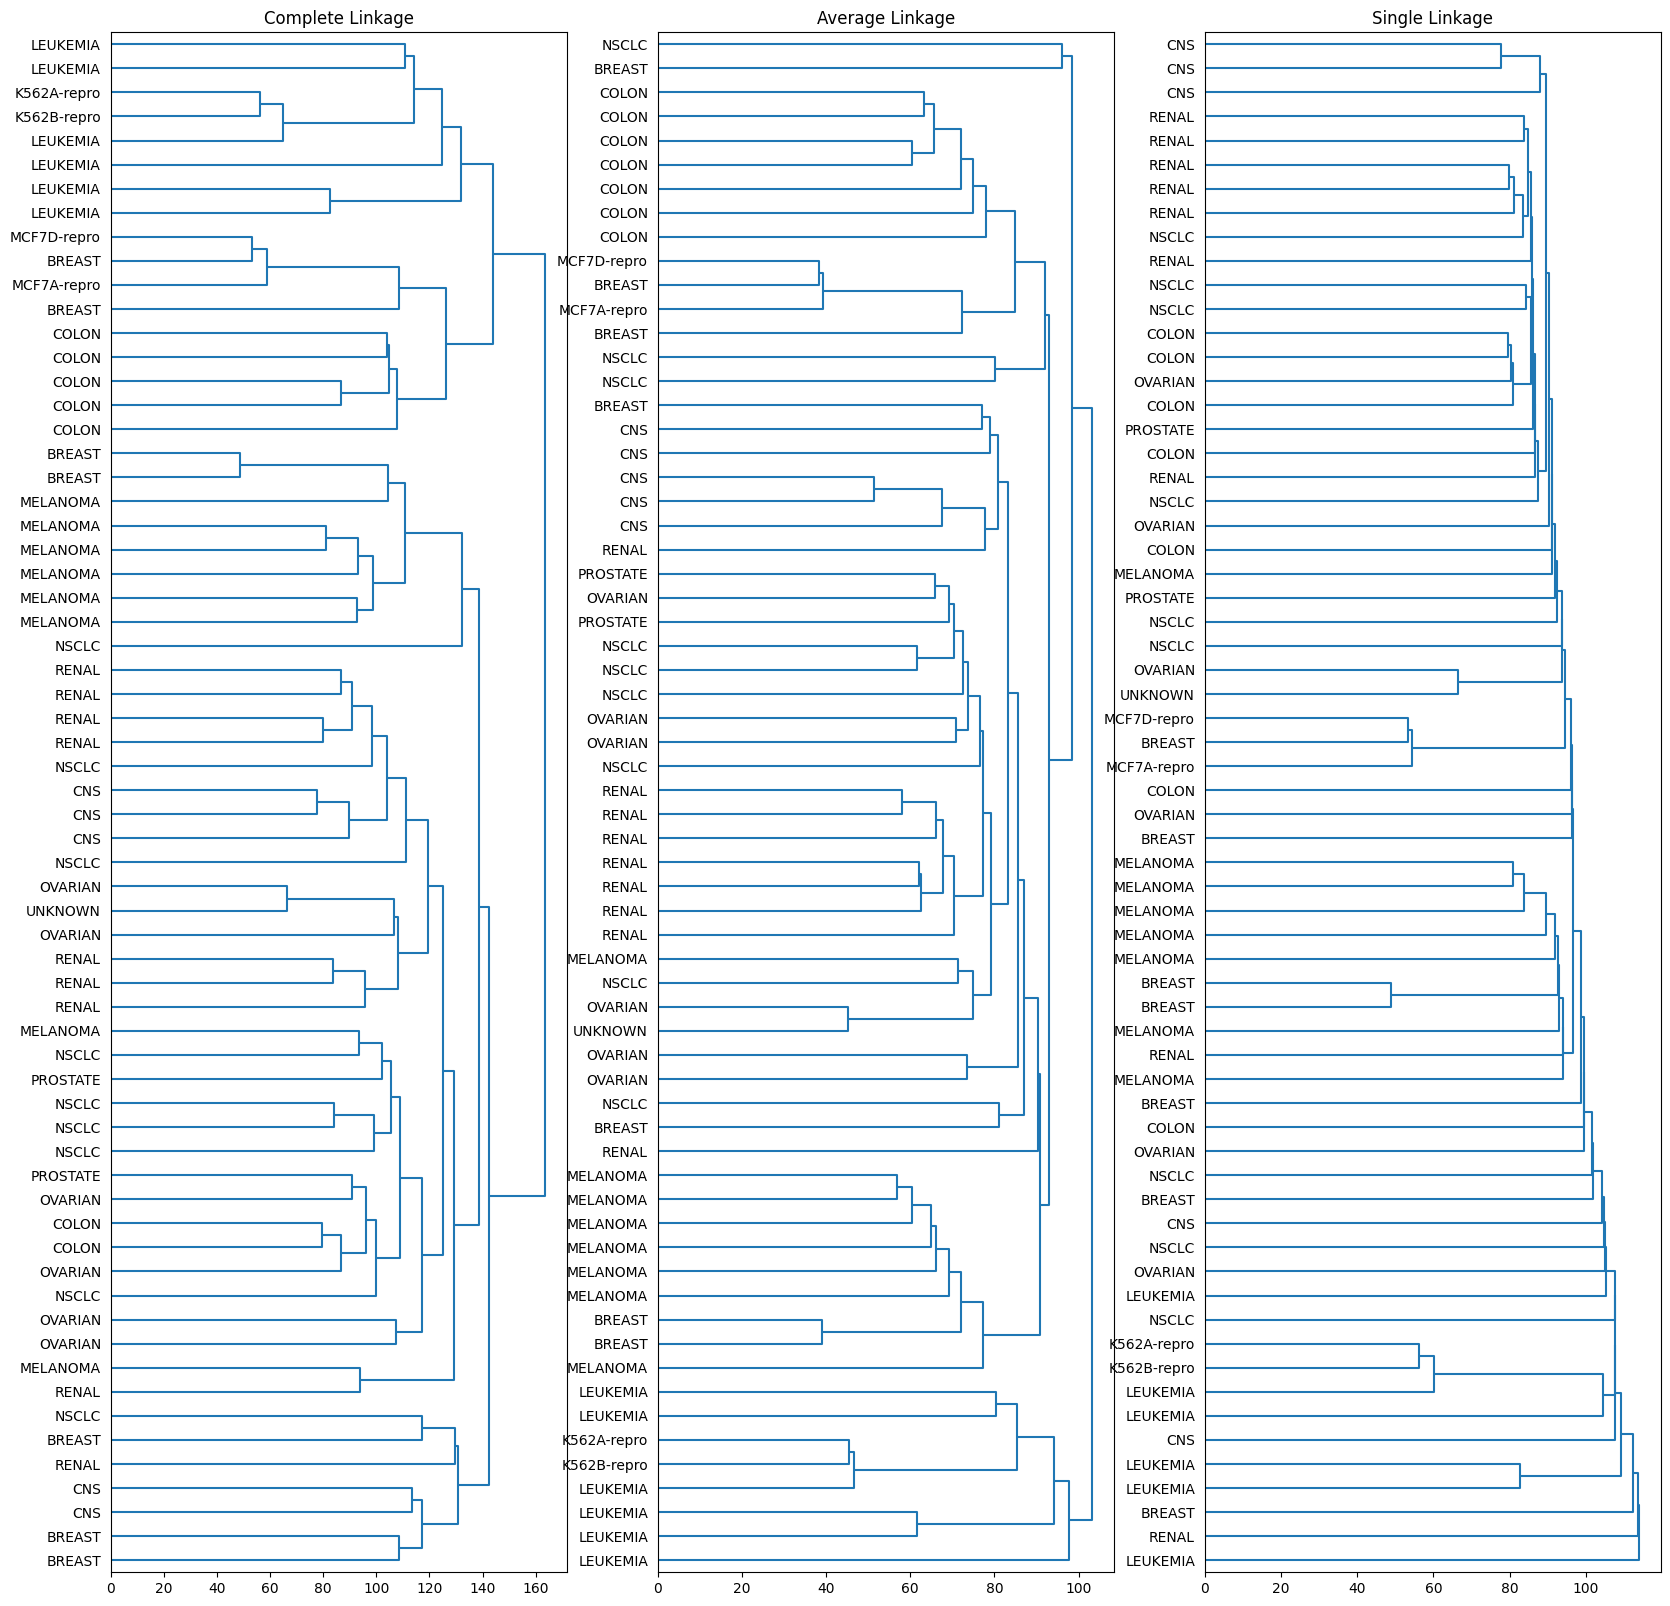

In [30]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,20))

for linkage, cluster, ax in zip([hierarchy.complete(X_standardized), hierarchy.average(X), hierarchy.single(X_standardized)],
                                ['c1','c2','c3'],
                                [ax1,ax2,ax3]):
    cluster = hierarchy.dendrogram(linkage, labels=X_standardized.index, orientation='right', color_threshold=0, leaf_font_size=10, ax=ax)

ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Single Linkage')
plt.show()

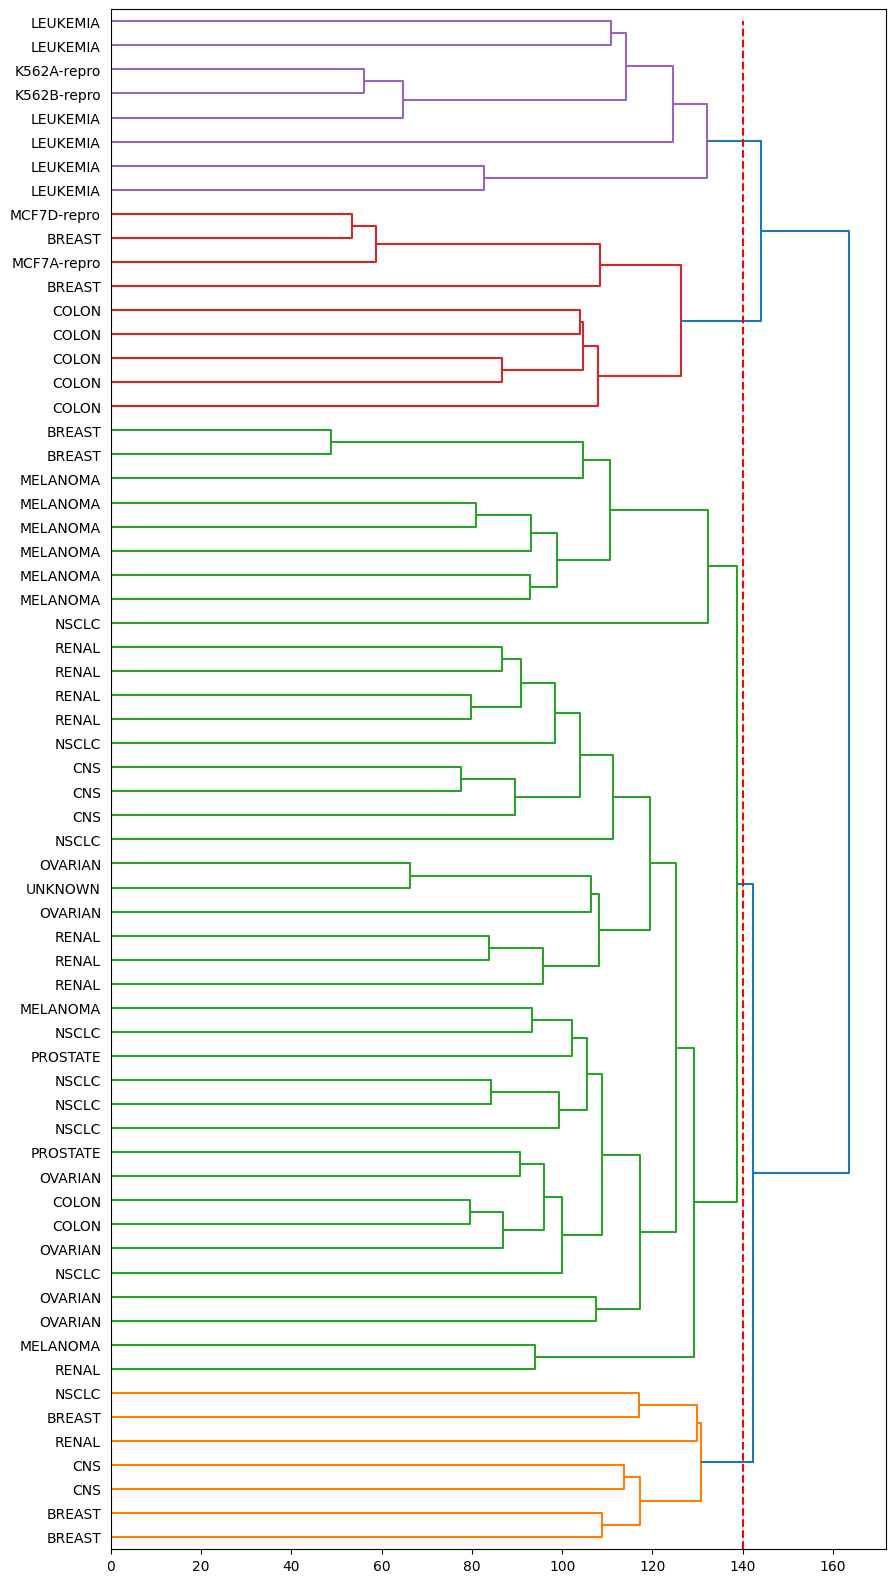

In [32]:
plt.figure(figsize=(10,20))
cut4 = hierarchy.dendrogram(hierarchy.complete(X_standardized),
                            labels=X_standardized.index, orientation='right', color_threshold=140, leaf_font_size=10)
plt.vlines(140,0,plt.gca().yaxis.get_data_interval()[1], colors='r', linestyles='dashed')
plt.show()

### Kmeans

In [33]:
np.random.seed(21)
km3 = KMeans(n_clusters=4, n_init=50)
km3.fit(X_standardized)

KMeans(n_clusters=4, n_init=50)

In [34]:
km3.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int32)

### Combine with PCA

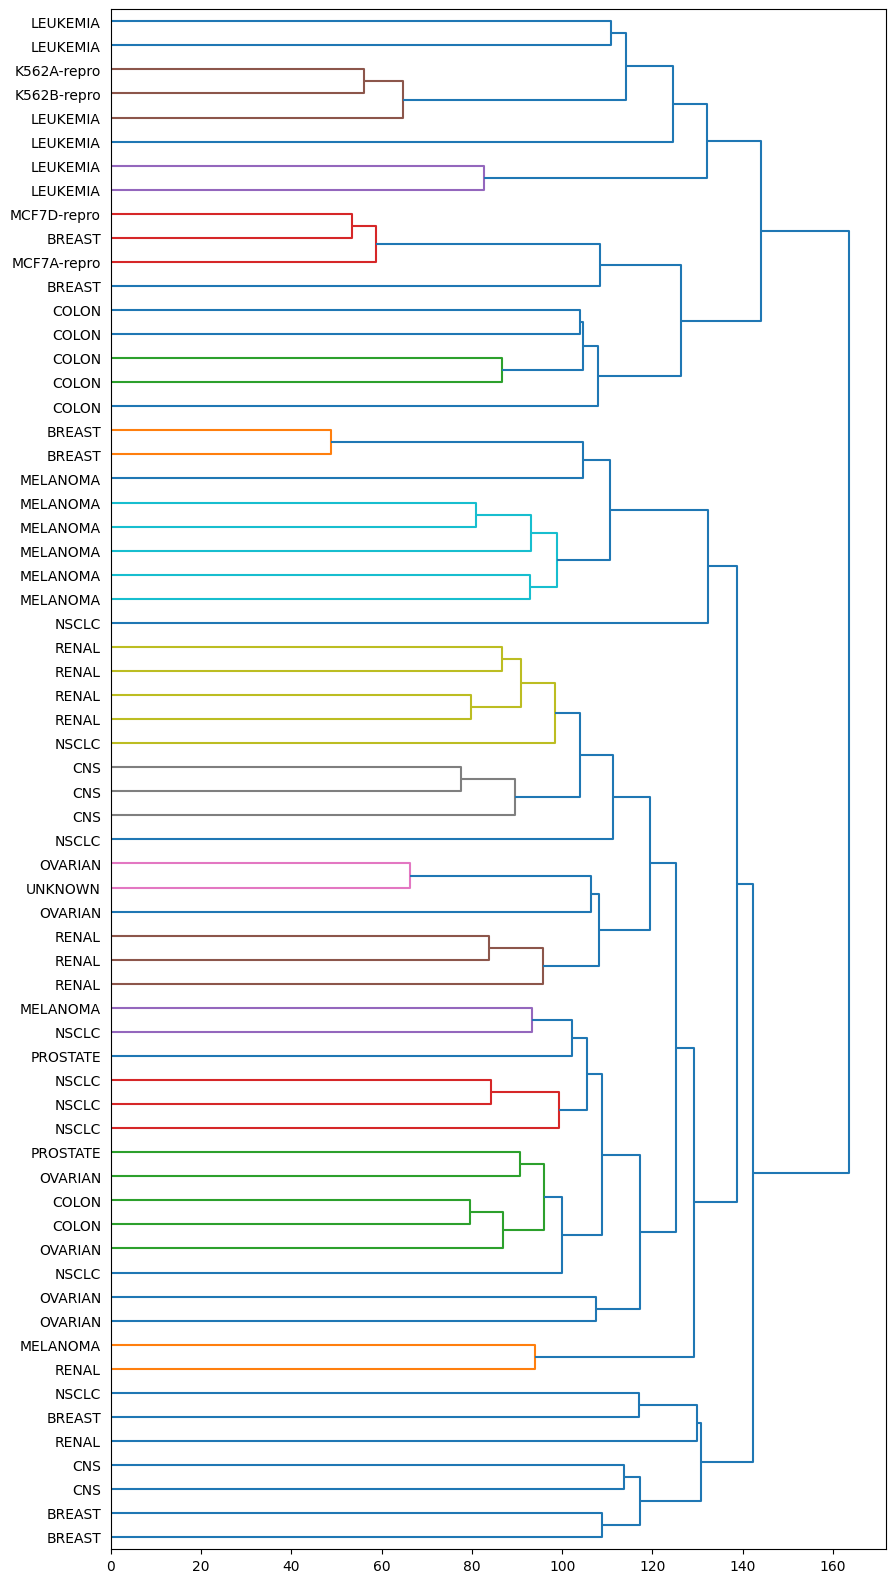

In [35]:
plt.figure(figsize=(10,20))
pca_cluster = hierarchy.dendrogram(hierarchy.complete(X_standardized), labels=X_standardized.index,
orientation='right', color_threshold=100, leaf_font_size=10)

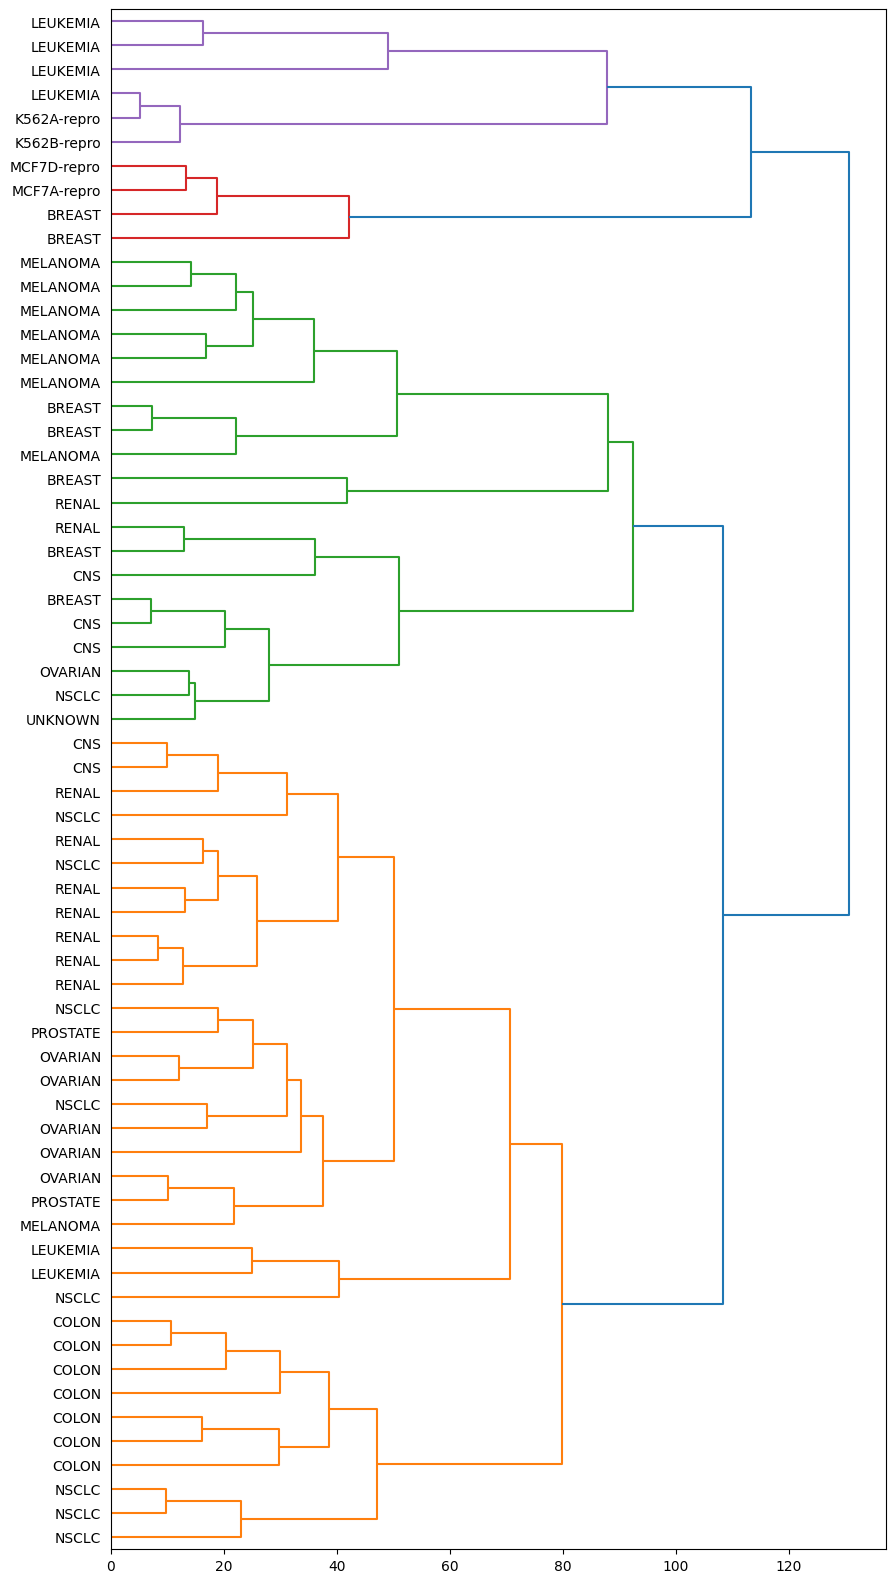

In [36]:
# Hierarchy based on Principal Components 1 to 5
plt.figure(figsize=(10,20))
pca_cluster = hierarchy.dendrogram(hierarchy.complete(df2_plot.iloc[:,:5]), labels=X_standardized.index,
orientation='right', color_threshold=100, leaf_font_size=10)